In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Genetic Algorithm for TSP**

In [2]:
# Gene - A city is a class with x,y coordinates.
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


# Calculating Fitness - Here we use distance as the fitness function, we will treat fitness as inverse
# of the route distance so that we can maximize the function to get
# shortest distance.

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0

    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [3]:
#Individual - Creating a single route based on the cities randomly
import random
random.seed(0)
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [4]:
# Population (A group of individuals (routes)) - We now make our initial population.
# Randomly producing the routes that satisfy the TSP conditions.

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

# Ranking fitness - We rank each individual of the population based on how
# short the distance is

import operator

def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)


In [5]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [6]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [7]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []

    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [8]:
# Now we compute the next generation using the previous functions

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    # pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1])) # Inverse to get the distane from fitness score

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)

    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [9]:
import copy
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

initial_pop = initialPopulation(100, cityList)

def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations,initial_pop):
    # pop = initialPopulation(popSize, population)
    pop = copy.deepcopy(initial_pop)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])

    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()


    return bestRoute

Initial distance: 1970.5651390337189
Final distance: 804.0506549886293


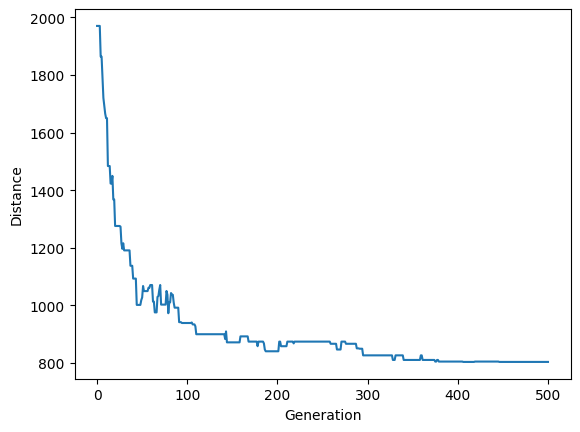

[(181,100), (179,136), (164,133), (168,151), (182,193), (181,196), (162,180), (95,173), (65,174), (47,193), (52,161), (56,151), (62,145), (0,98), (38,113), (86,122), (95,116), (102,80), (84,51), (94,20), (109,2), (123,50), (143,79), (156,60), (173,48)]


In [10]:
#geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)
bestroute = geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500,initial_pop=initial_pop)
print(bestroute)

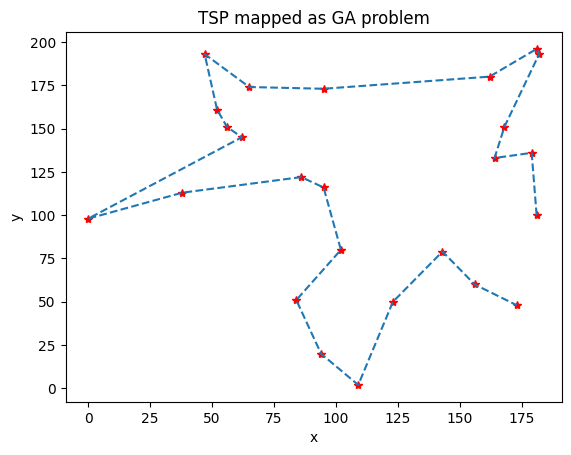

[(181,100), (179,136), (164,133), (168,151), (182,193), (181,196), (162,180), (95,173), (65,174), (47,193), (52,161), (56,151), (62,145), (0,98), (38,113), (86,122), (95,116), (102,80), (84,51), (94,20), (109,2), (123,50), (143,79), (156,60), (173,48)]


In [11]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)

**Using CA**

In [12]:
# send the max distance of 8 or less neighbours
def find_distance(arr,popRanked):
  max_fitness = 0
  cell = -1
  for i in range(len(arr)):
    for x in range(len(popRanked)):
      if(arr[i] == popRanked[x][0]):
        distance = popRanked[x][1]
        if(distance > max_fitness):
          max_fitness = distance
          cell = popRanked[x][0]

  return max_fitness,cell

In [13]:
# popRanked = [(59, 0.0004552725835690138), (30, 0.0004420110405079155), ....]
# Ignoring the elite List
# temp_arr[i,j-1] + temp_arr[i,j+1] + temp_arr[i-1,j-1] + temp_arr[i-1,j] + temp_arr[i-1,j+1] + temp_arr[i+1,j-1] + temp_arr[i+1,j] + temp_arr[i+1,j+1]
def selection_CA(popRanked, eliteSize,population_CA_cells_null_padded,N,population_CA_name):
    selectionResults = []
    selectionResults_final = []
    for i in range(1,N+1):
      for j in range(1,N+1):
        cell_index_i = i - 1
        cell_index_j = j - 1
        if(population_CA_cells_null_padded[i][j] == 1):
          neighbors = []
          if(cell_index_i > 0 and cell_index_i < N and cell_index_j -1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i][cell_index_j-1])
          if(cell_index_i > 0 and cell_index_i < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i][cell_index_j+1])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j - 1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j-1])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j > 0 and cell_index_j< N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j+1])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j - 1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j-1])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j > 0 and cell_index_j < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j+1])

          maxdistance,cellname = find_distance(neighbors,popRanked)
          selectionResults.append([population_CA_name[cell_index_i][cell_index_j],cellname])

    for x in range(len(selectionResults)):
      selectionResults_final.append(selectionResults[x])

    select_length = len(selectionResults)
    required_length = 100 - len(selectionResults)

    for i in range(0,required_length):
      selectionResults_final.append(random.choice(selectionResults))

    return selectionResults_final

In [14]:
def matingPool_CA(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index_0 = selectionResults[i][0]
        index_1 = selectionResults[i][1]
        # print(index_0)
        # print(index_1)
        matingpool.append([population[index_0],population[index_1]])


    return matingpool


def breedPopulation_CA(matingpool, eliteSize):
    children = []
    length = len(matingpool)

    for i in range(0,length):
      child = breed(matingpool[i][0],matingpool[i][1])
      children.append(child)
    return children

In [15]:
# # Testing the previous implementation
# popSize = 100
# population = cityList
# eliteSize = 20
# pop = initialPopulation(popSize, population)
# print(pop)
# popRanked = rankRoutes(pop)
# print(popRanked)
# selectionResults = selection(popRanked, eliteSize)
# print(selectionResults)
# matingpool = matingPool(pop, selectionResults)
# print(len(matingpool))
# print(matingpool)
# children = breedPopulation(matingpool, eliteSize)
# print(len(children))
# nextGeneration = mutatePopulation(children, 0.01)
# print(len(nextGeneration))

In [16]:
# N = 10
# population_CA_name = []
# for i in range(0,100,10):
#   arr = []
#   for x in range(0,N):
#     arr.append(x+i)
#   population_CA_name.append(arr)

# population_CA_name = np.array(population_CA_name)
# print(population_CA_name)

# population_CA_cells = np.random.choice([0, 1], size=(N,N))
# population_CA_cells_null_padded =  np.pad(population_CA_cells, [(1, 1), (1, 1)], mode='constant', constant_values=0)

# print(population_CA_cells_null_padded)

In [17]:
# # Testing
# newselects = selection_CA(popRanked,20,population_CA_cells_null_padded,10,population_CA_name)
# print(len(newselects))
# print(newselects)

In [18]:
# # Testing
# matingpool = matingPool_CA(pop, newselects)
# print(len(matingpool))
# print(matingpool)

In [19]:
# breeding = breedPopulation_CA(matingpool,20)
# print(len(breeding))
# print(breeding)

In [20]:
# mutation = mutatePopulation(breeding,0.01)
# print(len(mutation))
# print(mutation)

In [21]:
#Evolve CA

def evolve_CA_rule3(population_CA_cells_null_padded,N,iterations):
  # Rule 2
  temp_arr = population_CA_cells_null_padded
  out_arr = np.zeros((N+2,N+2))
  living_cells_rule2 = []
  for itr in range(iterations):
    for i in range(1,N+1):
      for j in range(1,N+1):
        sum = temp_arr[i,j-1] + temp_arr[i,j+1] + temp_arr[i-1,j-1] + temp_arr[i-1,j] + temp_arr[i-1,j+1] + temp_arr[i+1,j-1] + temp_arr[i+1,j] + temp_arr[i+1,j+1]
        if(temp_arr[i][j] == 1):
          if(sum == 2 or sum == 4 or sum == 6 or sum == 8):
            out_arr[i,j] = 1
          else:
            out_arr[i,j] = 0
        else:
          if(sum == 1 or sum == 3 or sum == 5 or sum == 7):
            out_arr[i,j] = 1
          else:
            out_arr[i,j] = 0



    temp_arr = out_arr
    living_cells_rule2.append(np.sum(out_arr))
    out_arr = np.zeros((N+2,N+2))
  return temp_arr

In [22]:
def place_new_children(population,mutated_result,newselects,popRanked):
  for i in range(len(newselects)):
    index = newselects[i][0]
    orig_fitness = -1
    for x in range(len(popRanked)):
      if(index == popRanked[x][0]):
        orig_fitness = popRanked[x][1]
        break

    present_fitness = Fitness(mutated_result[i]).routeFitness()
    if(present_fitness > orig_fitness):
      population[index] = mutated_result[i]
  return population

In [23]:
def nextGeneration_hybridCA(currentGen, eliteSize, mutationRate,population_CA_cells_null_padded,N,population_CA_name):
  popRanked = rankRoutes(currentGen)
  selectionResults = selection_CA(popRanked, eliteSize, population_CA_cells_null_padded,N,population_CA_name)
  matingpool = matingPool_CA(currentGen, selectionResults)
  children = breedPopulation_CA(matingpool, eliteSize)
  nextGeneration = mutatePopulation(children, mutationRate)
  evolve_temp_rule2 = evolve_CA_rule3(population_CA_cells_null_padded,N,1)
  return nextGeneration,selectionResults,evolve_temp_rule2,popRanked

In [24]:
np.random.seed(0)
# 0 -  987
# 32 - 985
alive_cells = []
def geneticAlgorithmPlot_HybridGA(population, popSize, eliteSize, mutationRate, generations,initial_pop):
    # pop = initialPopulation(popSize, population)
    pop = copy.deepcopy(initial_pop)
    progress = []

    N = 10
    population_CA_name = []
    for i in range(0,100,10):
      arr = []
      for x in range(0,N):
        arr.append(x+i)
        population_CA_name.append(arr)

    population_CA_name = np.array(population_CA_name)
    population_CA_cells = np.random.choice([0, 1], size=(N,N))
    population_CA_cells_null_padded =  np.pad(population_CA_cells, [(1, 1), (1, 1)], mode='constant', constant_values=0)
    alive_cells.append(np.sum(population_CA_cells_null_padded))

    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1])) # Inverse to get the distane from fitness score
    progress.append(1 / rankRoutes(pop)[0][1])

    for i in range(0, generations):
      nextGeneration,selectionResults,evolve_temp_rule2,popRanked = nextGeneration_hybridCA(pop, eliteSize, mutationRate, population_CA_cells_null_padded, N,population_CA_name)
      pop = place_new_children(pop,nextGeneration,selectionResults,popRanked)
      population_CA_cells_null_padded = copy.deepcopy(evolve_temp_rule2)
      alive_cells.append(np.sum(population_CA_cells_null_padded))
      progress.append(1 / rankRoutes(pop)[0][1])

    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    print(progress)
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

    return bestRoute,alive_cells

Initial distance: 1970.5651390337189
Final distance: 962.622909964771
[1970.5651390337189, 1970.5651390337189, 1970.5651390337189, 1970.5651390337189, 1970.5651390337189, 1970.1796736451433, 1789.4892401651118, 1766.007746091191, 1681.8626330957852, 1558.9940406135966, 1558.9940406135966, 1557.2548021459518, 1518.6194113526465, 1471.5137830621966, 1471.5137830621966, 1449.2343770269986, 1413.5250554822135, 1337.578343026314, 1337.578343026314, 1255.990208640798, 1255.990208640798, 1246.074447417462, 1246.074447417462, 1238.0374157799959, 1230.7520015330115, 1227.3195161278786, 1227.3195161278786, 1227.3195161278786, 1227.3195161278786, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1202.7646674216705, 1200.9146432950265, 1200.9146432950265, 1200.9146432950265, 1200.9146432950265, 1200.9146432950265, 1200.91464329502

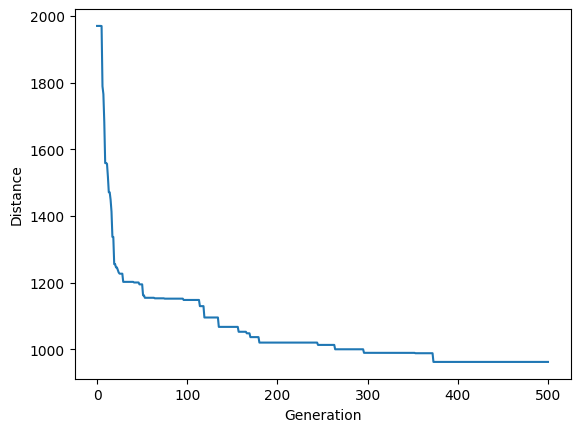

[(181,196), (182,193), (168,151), (179,136), (164,133), (181,100), (173,48), (123,50), (84,51), (94,20), (109,2), (156,60), (143,79), (102,80), (0,98), (38,113), (52,161), (47,193), (65,174), (95,116), (86,122), (62,145), (56,151), (95,173), (162,180)]


In [25]:
bestroute,alive_cells = geneticAlgorithmPlot_HybridGA(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500,initial_pop=initial_pop)
print(bestroute)

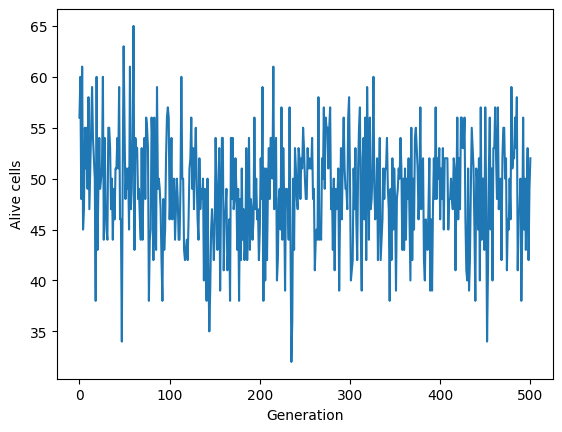

In [26]:
plt.plot(alive_cells)
plt.ylabel('Alive cells')
plt.xlabel('Generation')
plt.show()

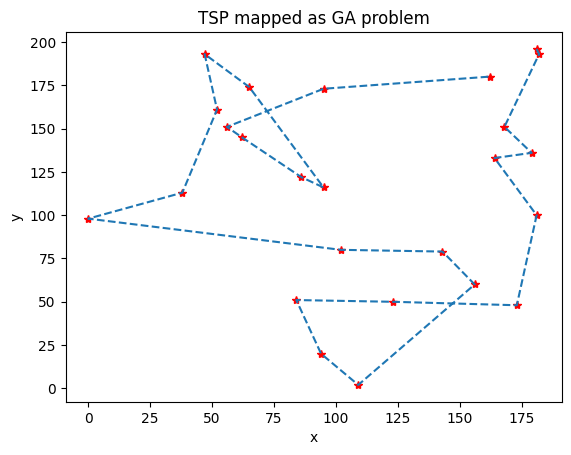

[(181,196), (182,193), (168,151), (179,136), (164,133), (181,100), (173,48), (123,50), (84,51), (94,20), (109,2), (156,60), (143,79), (102,80), (0,98), (38,113), (52,161), (47,193), (65,174), (95,116), (86,122), (62,145), (56,151), (95,173), (162,180)]


In [27]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)